# Лабораторная работа №3
## Визуализация данных
## Вариант №13

### Цель работы

Изучение программных средств для визуализации наборов данных.

### Индивидуальное задание

1. Подберите набор данных на ресурсах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима..

https://www.kaggle.com/datasets/fortuneuwha/world-instant-noodles-consumption-2022/

2. Проведите первичный анализ данных. Особое внимание следует уделить графическому представлению распрееделений признаков, визуализации взаимосвзей, позволяющие судить о наборе данных. Построение графиков желательно произвести по нескольким проекциям. При анализе данных использовать как можно более разнообразные типы графиков.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("noodles.csv")
df.head(5)

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009


In [66]:
df.sample(5)

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
46,Belgium,10.0,20.0,20.0,20,20.0,81,BEL,Belgium,Brussels,Europe,11655930
8,Nigeria,1820.0,1920.0,2460.0,2620,2790.0,6,NGA,Nigeria,Abuja,Africa,218541212
28,Canada,190.0,190.0,190.0,200,200.0,39,CAN,Canada,Ottawa,North America,38454327
39,Sweden,40.0,50.0,60.0,60,60.0,87,SWE,Sweden,Stockholm,Europe,10549347
17,Egypt,220.0,280.0,350.0,400,460.0,14,EGY,Egypt,Cairo,Africa,110990103


In [67]:
num_of_rows , nums_of_columns = df.shape
print(f"size = {df.size}")
print(f"number of rows = {num_of_rows} and number of columns = {nums_of_columns}")

size = 636
number of rows = 53 and number of columns = 12


In [68]:
df.columns

Index(['Country/Region', '2018', '2019', '2020', '2021', '2022', 'Rank',
       'CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population'],
      dtype='object')

In [69]:
df.describe()

,2018,2019,2020,2021,2022,Rank,2022 Population
count,52.000000,52.000000,52.000000,53.000000,52.000000,53.000000,5.300000e+01
mean,1782.692308,1833.461538,1989.423077,1952.075472,2046.730769,45.698113,1.143409e+08
std,5849.555410,6009.552815,6659.770771,6321.729120,6554.724900,36.322056,2.691011e+08
min,10.000000,10.000000,0.000000,10.000000,10.000000,1.000000,5.180829e+06
25%,50.000000,57.500000,67.500000,60.000000,67.500000,17.000000,1.784391e+07
50%,190.000000,230.000000,240.000000,270.000000,260.000000,37.000000,3.985714e+07
75%,902.500000,915.000000,942.500000,900.000000,1037.500000,68.000000,8.855057e+07
max,40250.000000,41450.000000,46360.000000,43990.000000,45070.000000,124.000000,1.425887e+09


In [70]:
df.dtypes

Country/Region        object
2018                 float64
2019                 float64
2020                 float64
2021                   int64
2022                 float64
Rank                   int64
CCA3                  object
Country/Territory     object
Capital               object
Continent             object
2022 Population        int64
dtype: object

**Dataset Glossary (Column-Wise)**:

    - Country/Region: The name of the country or region.

    - 2018, 2019, 2020, 2021, 2022: The consumption values in millions of US dollars for each respective year.

    - Rank: The ranking of the country based on Population in 2022.

    - CCA3: The three-letter country code.

    - Country/Territory: The full name of the country or territory.

    - Capital: The capital city of the country.

    - Continent: The continent to which the country belongs.

    - 2022 Population: The population of the country in 2022.

In [71]:
df['Continent'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'North America',
       'Oceania'], dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

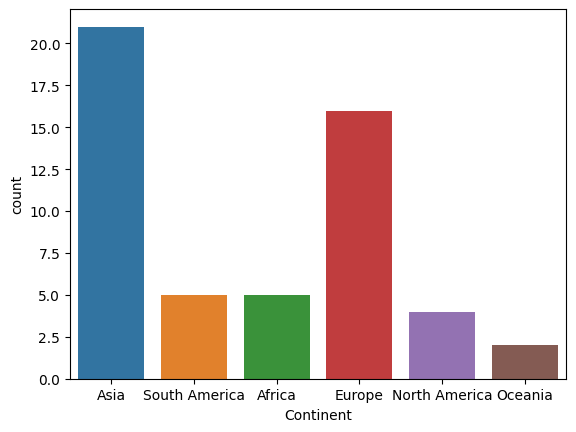

In [72]:
sns.countplot(x='Continent' ,data=df)

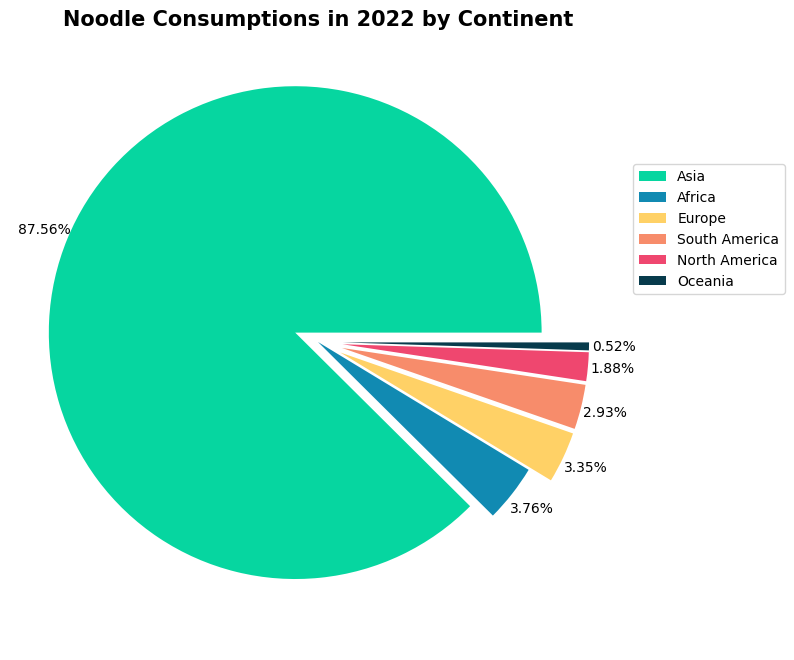

In [73]:
plt.figure(figsize=(8,8))
explode = (0.1, 0, 0.1, 0.1, 0.1, 0.1)
color = ["#06D6A0","#118AB2","#FFD166","#F78C6B","#EF476F","#073B4C"]
df_continent = df.groupby("Continent").agg(sum_consumption  = ("2022", "sum")).reset_index().sort_values(ascending =False, by = "sum_consumption")
ax = plt.pie(df_continent["sum_consumption"], autopct="%1.2f%%", explode=explode, pctdistance=1.1, colors=color)
plt.title("Noodle Consumptions in 2022 by Continent", fontdict={"fontsize":15,
                                                       "fontweight":"bold"})
plt.legend(df_continent["Continent"], loc="best", bbox_to_anchor=(1, 0.8))
plt.show()

array([[<Axes: title={'center': '2018'}>,
        <Axes: title={'center': '2019'}>,
        <Axes: title={'center': '2020'}>],
       [<Axes: title={'center': '2021'}>,
        <Axes: title={'center': '2022'}>,
        <Axes: title={'center': 'Rank'}>],
       [<Axes: title={'center': '2022 Population'}>, <Axes: >, <Axes: >]],
      dtype=object)

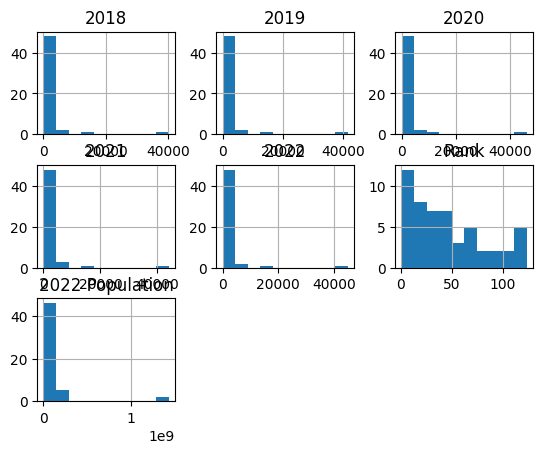

In [74]:
df.hist()

<Axes: >

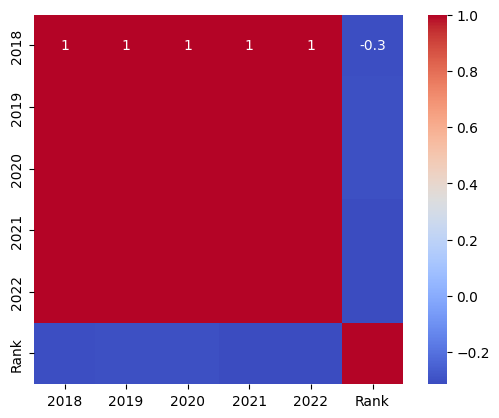

In [75]:
correlation_mat = df[['2018', '2019', '2020', '2021', '2022', 'Rank']].corr()
sns.heatmap(correlation_mat,square=True,annot=True,cmap="coolwarm")

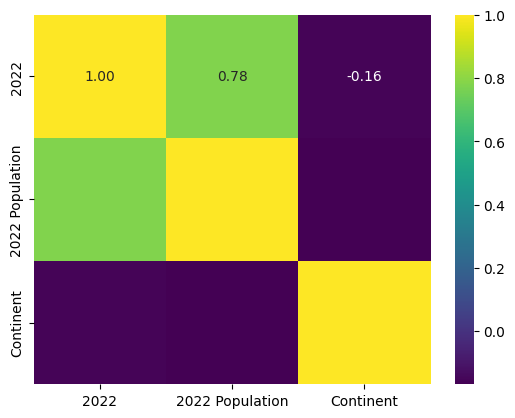

In [76]:
from sklearn.preprocessing import LabelEncoder
df_corr = df[["2022","2022 Population","Continent"]].copy()
df_corr["Continent"] = LabelEncoder().fit_transform(df_corr["Continent"])
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.show()

<Axes: >

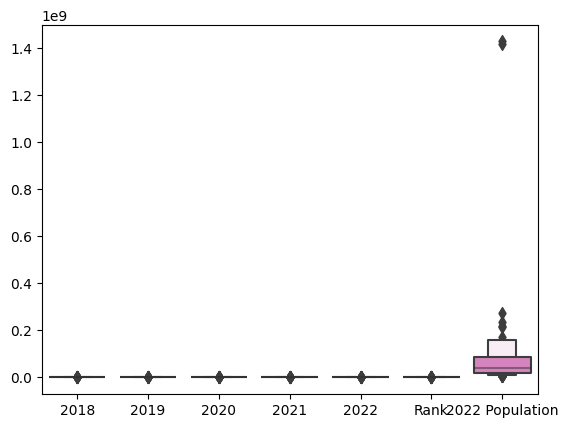

In [77]:
sns.boxenplot(data=df)

Text(0, 0.5, '2022 Population')

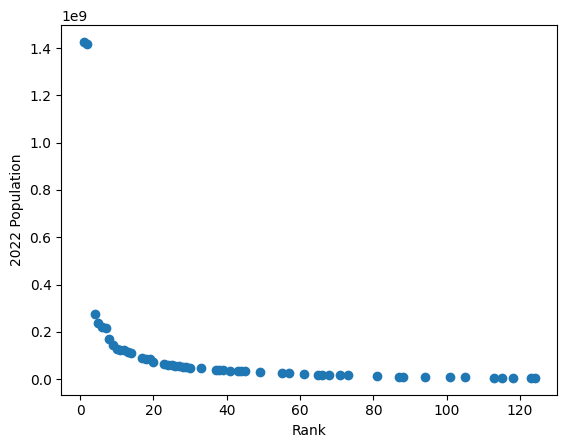

In [78]:
plt.scatter(df['Rank'],df['2022 Population'])

plt.xlabel("Rank")
plt.ylabel("2022 Population")

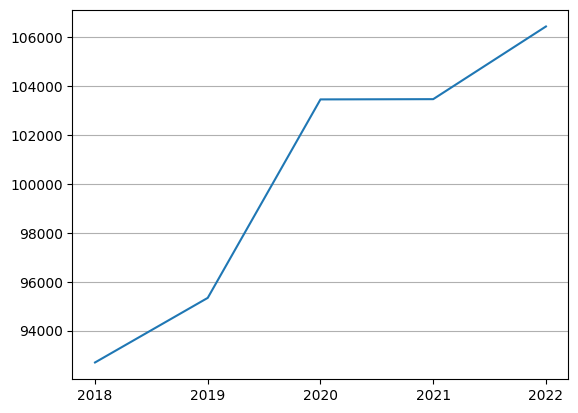

In [79]:
sns.lineplot(df[['2018', '2019', '2020', '2021', '2022']].sum())
plt.grid(linestyle='-',axis='y')

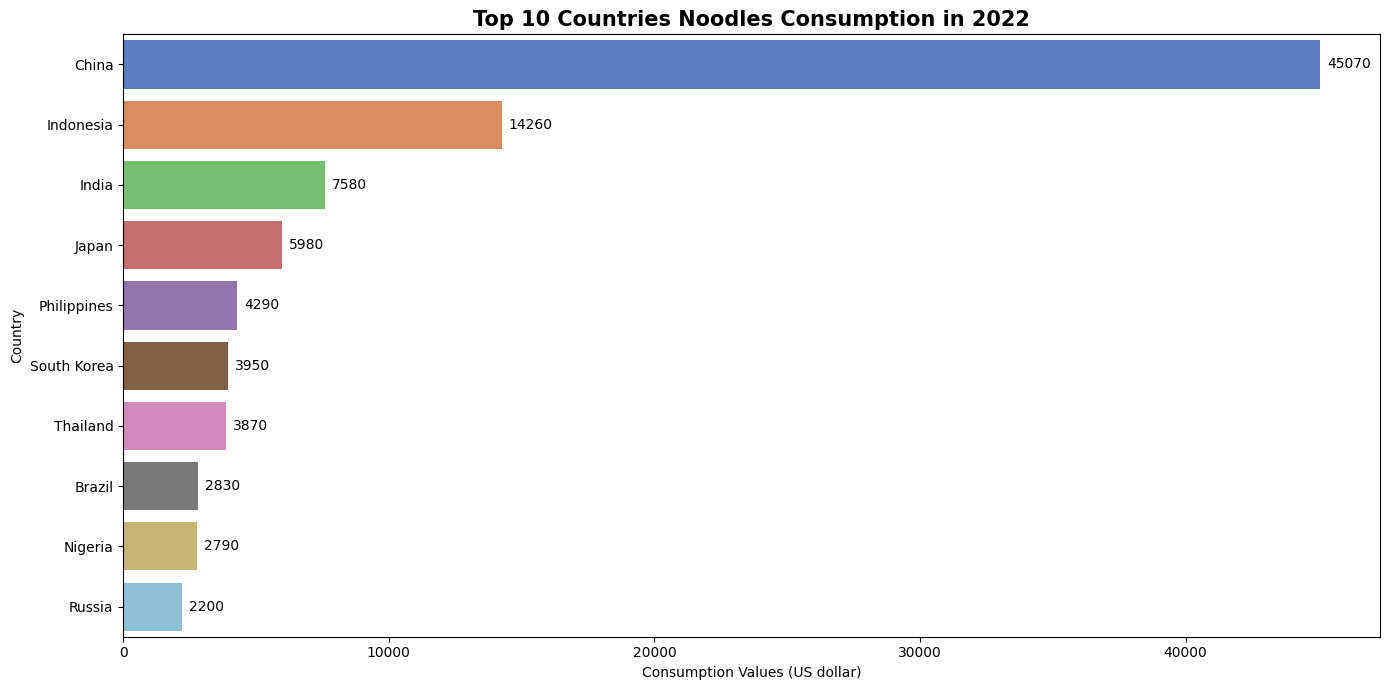

In [80]:
year = 2022
plt.figure(figsize=(14,7))
ax = sns.barplot(data = df.head(10), y = "Country/Region", 
                 x = f"{year}", palette = "muted")
ax.bar_label(ax.containers[0], color = "black", padding=5)
plt.title(f"Top 10 Countries Noodles Consumption in {year}", 
          fontdict={"fontsize" : 15,
                   "fontweight": "bold"})
plt.ylabel("Country")
plt.xlabel("Consumption Values (US dollar)")
plt.tight_layout()
plt.show()

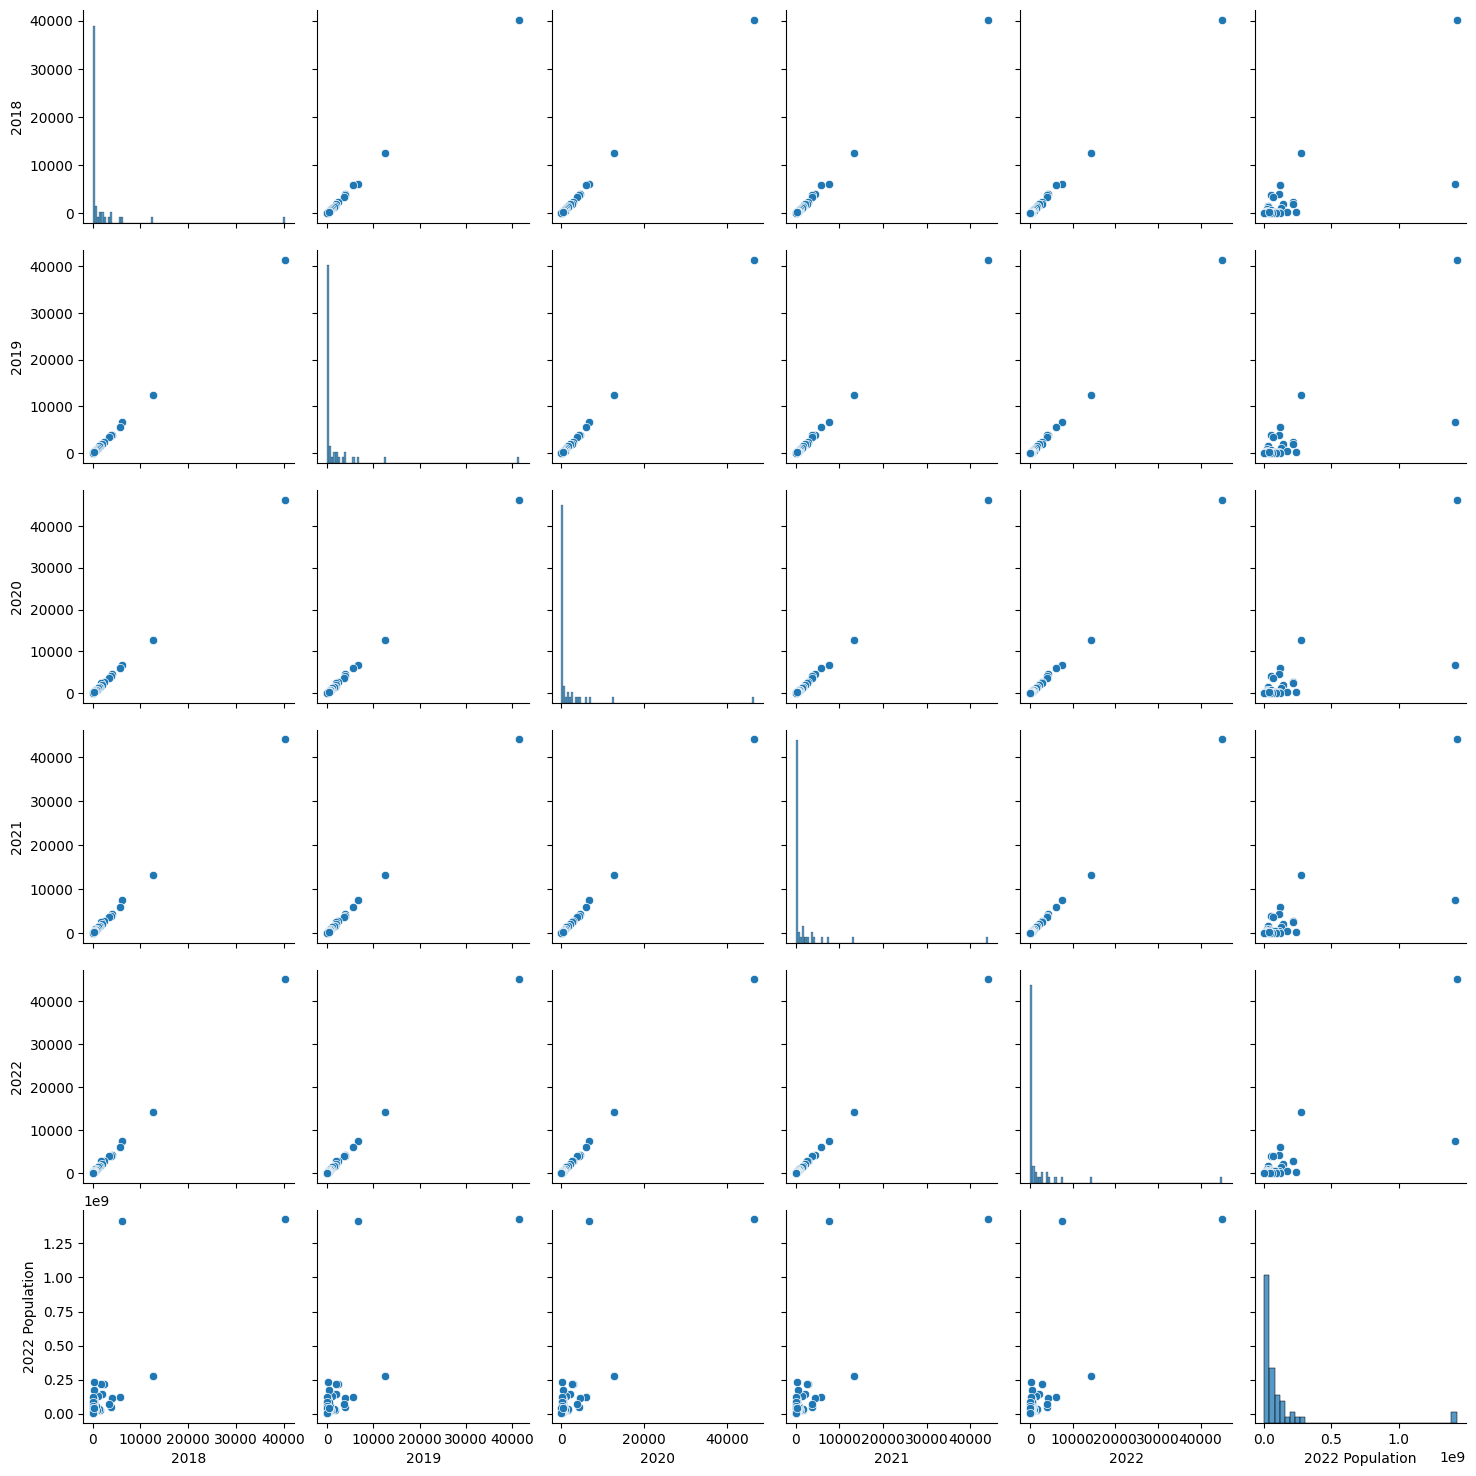

In [81]:
feats=[f for f in df.columns if '0' in f]
sns.pairplot(df[feats]);

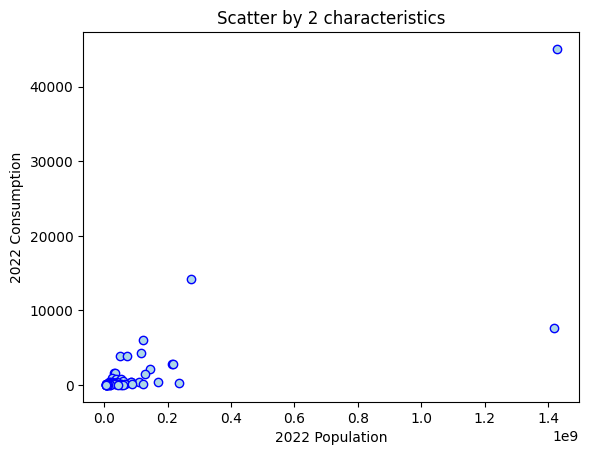

In [85]:
plt.scatter(
    df['2022 Population'], 
    df['2022'], 
    color='lightblue', edgecolors='blue'
)

plt.xlabel('2022 Population')
plt.ylabel('2022 Consumption')
plt.title('Scatter by 2 characteristics');

In [83]:
df.corr(numeric_only=True)

,2018,2019,2020,2021,2022,Rank,2022 Population
2018,1.000000,0.999845,0.999180,0.999496,0.999568,-0.304802,0.766422
2019,0.999845,1.000000,0.999417,0.999760,0.999711,-0.304339,0.774951
2020,0.999180,0.999417,1.000000,0.999322,0.998937,-0.299337,0.769503
2021,0.999496,0.999760,0.999322,1.000000,0.999865,-0.311806,0.782359
2022,0.999568,0.999711,0.998937,0.999865,1.000000,-0.314670,0.778524
Rank,-0.304802,-0.304339,-0.299337,-0.311806,-0.314670,1.000000,-0.408268
2022 Population,0.766422,0.774951,0.769503,0.782359,0.778524,-0.408268,1.000000


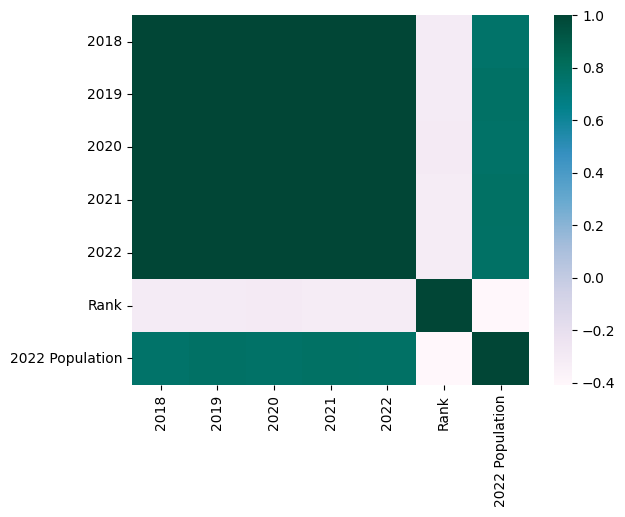

In [84]:
sns.heatmap(df.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

### Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:

1. Номер и название лабораторной работы; задачи лабораторной работы.

2. Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.

3. Ответы на контрольные вопросы.

4. Листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.

### Контрольные вопросы

1. Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных.

`sns.countplot(), plt.pie(), sns.heatmap(), sns.boxenplot(), sns.barplot(), ...`

2. Какая библиотека python предназначена для управления наборами данных: `numpy`, `pandas`, `sklearn`, `opencv`, `matplotlib`?

Для управления наборами данных в Python используется библиотека `pandas`

3. Какая стратегия является нежелательной при обработке пропусков в данных?

   а) замена пропущенных значений в столбце медианным значением по данному столбцу;

    б) удаление строк, содержащих пропуски в данных;  

    в) замена пропущенных значений в столбце средним арифметическим значением по данному столбцу;

    г) замена пропущенных значений в столбце наиболее часто встречающимся значением по данному столбцу;

Удаление строк с пропущенными значениями (`вариант б`) нежелательно, потому что это может привести к потере важной информации и снижению репрезентативности данных. Замена пропусков медианным, средним или наиболее частым значением (варианты а, в, г) обычно предпочтительнее, поскольку позволяет сохранить больше данных для анализа.

5. Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная $y$, которая представляет собой категориальный признак, опеределнный на домене {`C#`, `Java`, `Python`, `R`}. Нужно ли применять к данному целевому признаку `OneHotEncoder`?

Да, к данному категориальному целевому признаку $𝑦$, представленному доменом {`C#`, `Java`, `Python`, `R`}, целесообразно применять `OneHotEncoder`. Этот метод преобразует категориальные переменные в бинарные признаки, создавая отдельный столбец для каждой уникальной категории и помещая в каждый столбец бинарные значения (1 или 0) в зависимости от принадлежности категории.

Применение `OneHotEncoder` помогает избежать ненужной упорядоченности или весов при работе с категориальными данными, а также обеспечивает правильное представление модели машинного обучения.

6. Какой код лучше использовать при загрузке данных из csv-файла?

   а) `dataset = read_csv('data.csv')`

    б) `dataset = import('data.csv')` 

    в) `dataset = read.csv('data.csv')`

    г) `dataset = import.csv('data.csv')`

    д) `dataset = read_xls('data.csv')`

Правильный вариант:  а) `dataset = read_csv('data.csv')` (используется `pandas`, загрузка `csv`-файла в `dataframe`)
